<a href="https://colab.research.google.com/github/cam2149/MachineLearningIII/blob/main/SVM_Taller%20(Ejercicio3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines

### Ejercicio 3

La siguiente parte cargará y trazará el conjunto de datos 2. En el gráfico, puede observar que no existe un límite de decisión lineal que separe los ejemplos positivos y negativos para este conjunto de datos. Sin embargo, al utilizar el núcleo gaussiano con SVM, podrá aprender un límite de decisión no lineal que puede funcionar razonablemente bien para el conjunto de datos.

Debe cambiar el parámetro $\gamma$, está asociado al parámetro $\sigma$, de la primera ecuación. No debe utilizar valores superiores a 50.

¿Cuál es el efecto de cambiar el parámetro $\gamma$?

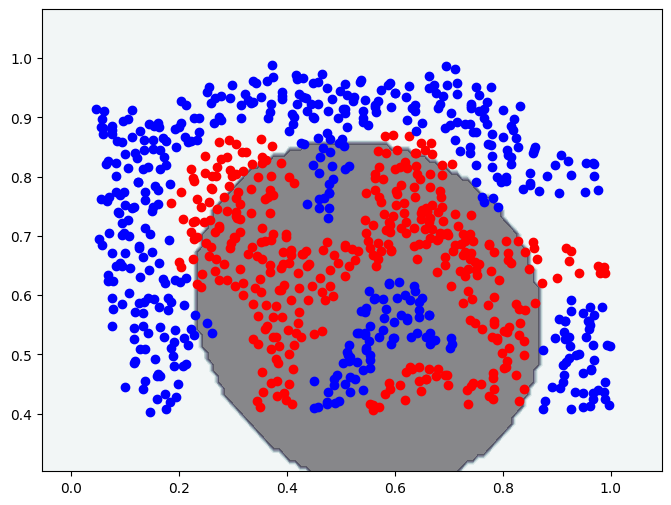

In [ ]:
########################################################################################
def plot_hyperplane(clf, X):
    # create a mesh to plot in
    h=0.01
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    CS=plt.contourf(xx, yy, Z,cmap=plt.cm.bone,alpha=0.5)
    #CS.cmap.set_under('yellow')
    #CS.cmap.set_over('cyan')

########################################################################################
#cargar dataset2
data=np.loadtxt('dataset2.data',delimiter=',')
X=data[:,:2]
Y=data[:,2].astype(int)
########################
##graficar datos
plt.figure(figsize=(8, 6))

plt.plot(X[Y==0,0],X[Y==0,1],'or')
plt.plot(X[Y==1,0],X[Y==1,1],'ob')
########################################################################
#create classifiers
C    = 1  # parametro de regularizacion de la svm
gamma= 1 #parametro gamma de la funcion de base radial
clf_rbf     = svm.SVC(kernel='rbf', gamma=gamma, C=C)
#entrenar
clf_rbf.fit(X, Y)

#graficar frontera
plot_hyperplane(clf_rbf,X)



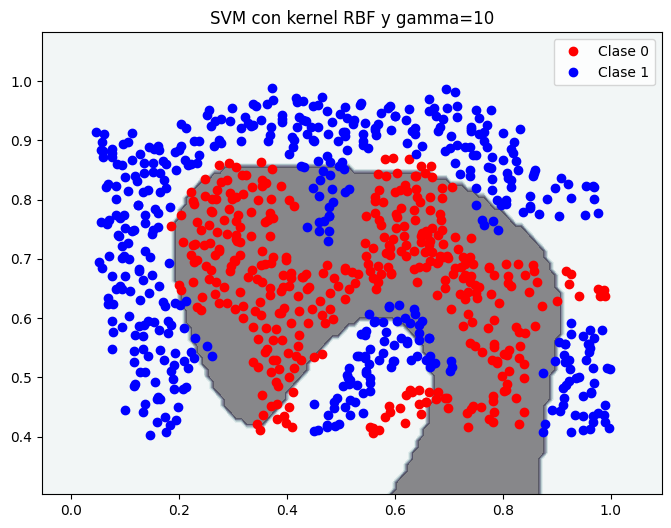

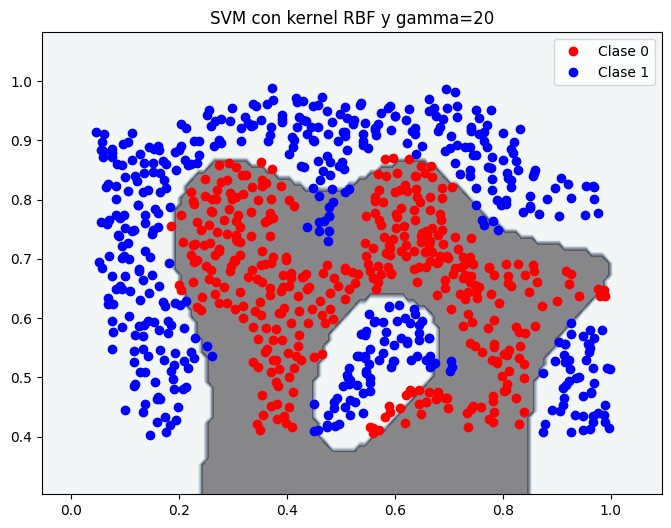

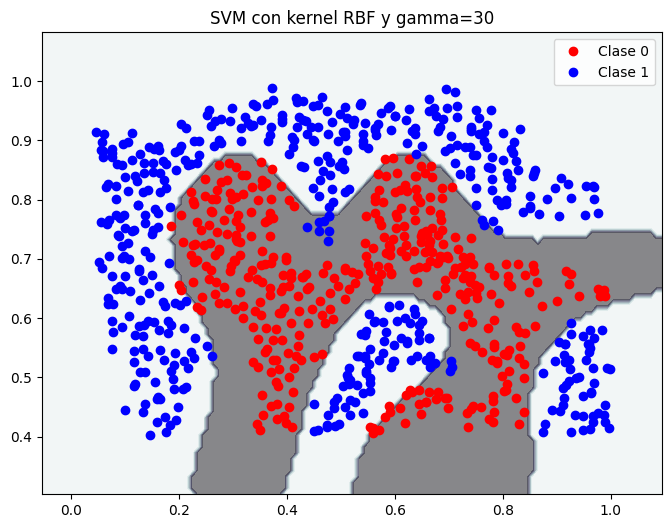

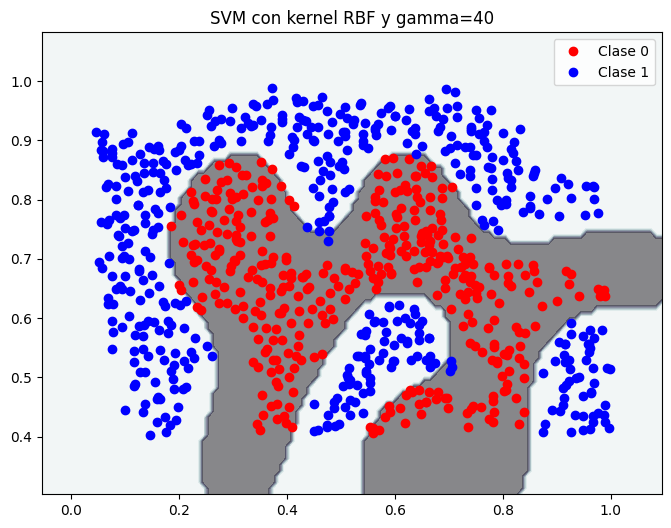

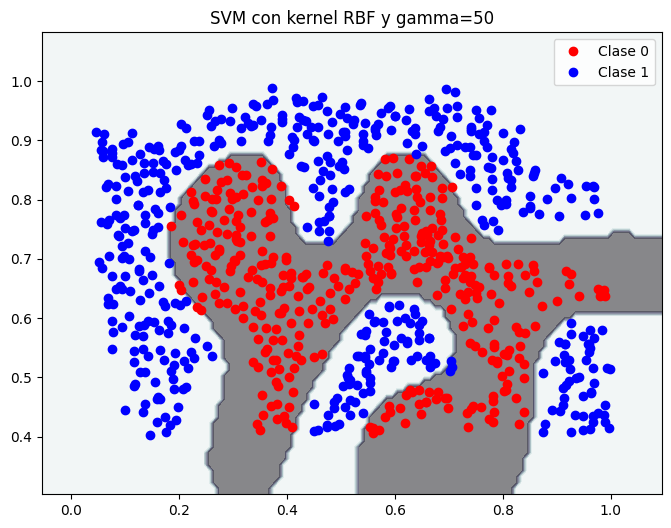

In [ ]:
# Ajustar y graficar con diferentes valores de gamma
gamma_values = [10, 20, 30, 40, 50]  # Prueba valores dentro del rango permitido

for gamma in gamma_values:
    # Crear y entrenar el clasificador
    clf_rbf = svm.SVC(kernel='rbf', gamma=gamma, C=1)
    clf_rbf.fit(X, Y)

    # Graficar los datos y el límite de decisión
    plt.figure(figsize=(8, 6))
    plt.title(f"SVM con kernel RBF y gamma={gamma}")
    plt.plot(X[Y == 0, 0], X[Y == 0, 1], 'or', label='Clase 0')
    plt.plot(X[Y == 1, 0], X[Y == 1, 1], 'ob', label='Clase 1')
    plot_hyperplane(clf_rbf, X)
    plt.legend()
    plt.show()


El efecto de cambiar el parametro  $\gamma$ es que tanto se ajusta a la figura que genera el dataset, es decir, mientras más grande sea el valor de  $\gamma$, más complejo se vuelve.